In [1]:
# import library yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# read dataset

path = 'dataset/london_crime_by_lsoa.csv'
df = pd.read_csv(path)  

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# mengecek ukuran dataframe

df.shape

(13490604, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Data Preprocessing

In [6]:
# menghapus data selain data pada tahun 2016

df.drop(df.index[df['year'] != 2016], inplace = True)

In [7]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2


In [8]:
# menghapus data yang valuenya 0

df = df[df.value != 0]

In [9]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [10]:
# reset index

df = df.reset_index(drop = True)

In [11]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [12]:
df.shape

(392042, 7)

In [13]:
# rename column name

df.columns = ['code', 'borough', 'major_crime', 'minor_crime',
              'number_of_crime', 'year', 'month' ]

In [14]:
df.head()

,code,borough,major_crime,minor_crime,number_of_crime,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


In [15]:
# menggabungkan jumlah crime di setiap region dan type of crime

london_crime = pd.pivot_table(df,values=['number_of_crime'], index=['borough'], columns=['major_crime'],
                              aggfunc=np.sum,fill_value=0)

In [16]:
london_crime.head()

number_of_crime                        \
major_crime                 Burglary Criminal Damage Drugs   
borough                                                      
Barking and Dagenham            1287            1949   919   
Barnet                          3402            2183   906   
Bexley                          1123            1673   646   
Brent                           2631            2280  2096   
Bromley                         2214            2202   728   

                                                                           \
major_crime          Other Notifiable Offences Robbery Theft and Handling   
borough                                                                     
Barking and Dagenham                       378     534               5607   
Barnet                                     499     464               9731   
Bexley                                     294     209               4392   
Brent                                      536     919               9026   
Bromley                                    417     369               7584   

                                                  
major_crime          Violence Against the Person  
borough                                           
Barking and Dagenham                        6067  
Barnet                                      7499  
Bexley                                      4503  
Brent                                       9205  
Bromley                                     6650

In [17]:
# reset index

london_crime.reset_index(inplace = True)

In [18]:
london_crime.head()

borough number_of_crime                        \
major_crime                              Burglary Criminal Damage Drugs   
0            Barking and Dagenham            1287            1949   919   
1                          Barnet            3402            2183   906   
2                          Bexley            1123            1673   646   
3                           Brent            2631            2280  2096   
4                         Bromley            2214            2202   728   

                                                                  \
major_crime Other Notifiable Offences Robbery Theft and Handling   
0                                 378     534               5607   
1                                 499     464               9731   
2                                 294     209               4392   
3                                 536     919               9026   
4                                 417     369               7584   

                                         
major_crime Violence Against the Person  
0                                  6067  
1                                  7499  
2                                  4503  
3                                  9205  
4                                  6650

In [19]:
# menambahkan kolom baru yg berisi total kejahatan di setiap region

london_crime['Total'] = london_crime.sum(axis=1)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_18012/3041611164.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  london_crime['Total'] = london_crime.sum(axis=1)


In [20]:
london_crime.head()

borough number_of_crime                        \
major_crime                              Burglary Criminal Damage Drugs   
0            Barking and Dagenham            1287            1949   919   
1                          Barnet            3402            2183   906   
2                          Bexley            1123            1673   646   
3                           Brent            2631            2280  2096   
4                         Bromley            2214            2202   728   

                                                                  \
major_crime Other Notifiable Offences Robbery Theft and Handling   
0                                 378     534               5607   
1                                 499     464               9731   
2                                 294     209               4392   
3                                 536     919               9026   
4                                 417     369               7584   

                                         Total  
major_crime Violence Against the Person         
0                                  6067  16741  
1                                  7499  24684  
2                                  4503  12840  
3                                  9205  26693  
4                                  6650  20164

In [21]:
# menggabungkan nama kolom agar tidak bertingkat

london_crime.columns = london_crime.columns.map(''.join)
london_crime.head()

,borough,number_of_crimeBurglary,number_of_crimeCriminal Damage,number_of_crimeDrugs,number_of_crimeOther Notifiable Offences,number_of_crimeRobbery,number_of_crimeTheft and Handling,number_of_crimeViolence Against the Person,Total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [22]:
# rename column name

london_crime.columns = ['borough', 'burglary','criminal damage','drugs','other notifiable offences',
                        'robbery','theft and handling','violence against the person', 'total']

In [23]:
london_crime.head()

,borough,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840
3,Brent,2631,2280,2096,536,919,9026,9205,26693
4,Bromley,2214,2202,728,417,369,7584,6650,20164


In [24]:
london_crime.describe()

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2069.242424,1941.545455,1179.212121,479.060606,682.666667,8913.121212,7041.848485,22306.696970
std,737.448644,625.207070,586.406416,223.298698,441.425366,4620.565054,2513.601551,8828.228749
min,2.000000,2.000000,10.000000,6.000000,4.000000,129.000000,25.000000,178.000000
25%,1531.000000,1650.000000,743.000000,378.000000,377.000000,5919.000000,5936.000000,16903.000000
50%,2071.000000,1989.000000,1063.000000,490.000000,599.000000,8925.000000,7409.000000,22730.000000
75%,2631.000000,2351.000000,1617.000000,551.000000,936.000000,10789.000000,8832.000000,27174.000000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [25]:
london_crime.shape

(33, 9)

In [26]:
# mengambil 5 angka terbesar berdasarkan kolom Total

highest_crime = london_crime.nlargest(5, 'total')
highest_crime

,borough,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636
24,Newham,2115,2496,1684,713,1472,11964,9646,30090
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


In [27]:
# mengambil 5 angka terkecil berdasarkan kolom Total

lowest_crime = london_crime.nsmallest(5, 'total')
lowest_crime

,borough,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
6,City of London,2,2,10,6,4,129,25,178
20,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983
28,Sutton,1233,1316,461,253,165,3516,3714,10658
26,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074
23,Merton,1419,1418,466,249,283,4894,4026,12755


# Area Plots

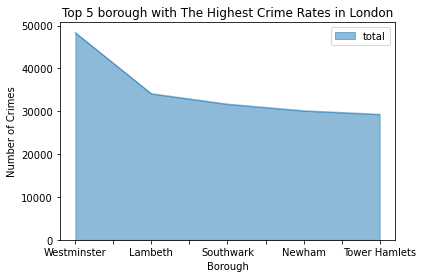

In [28]:
# membuat area plot 5 wilayah teratas dengan tingkat kejahatan tertinggi di London

highest_crime.plot(kind = 'area',
         x = 'borough', y = 'total', stacked = False)

plt.title('Top 5 borough with The Highest Crime Rates in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Borough')

plt.show()

**Kesimpulan**: Berdasarkan Area Plot di atas dapat disimpulkan bahwa Westminster memiliki angka kejahatan paling tinggi dan hampir mencapai angka 50000 kasus

In [29]:
# set region sebagai index

top5_crimes = highest_crime.set_index('borough')

In [30]:
# menghapus kolom total

top5_crimes.drop(['total'], axis=1, inplace=True)

In [31]:
top5_crimes

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person
borough,,,,,,,
Westminster,3218,2179,2049,708,1822,27520,10834
Lambeth,3087,2764,2738,635,1196,13155,10496
Southwark,2946,2621,1838,494,1317,12946,9474
Newham,2115,2496,1684,713,1472,11964,9646
Tower Hamlets,2794,2357,1629,678,1234,10953,9608


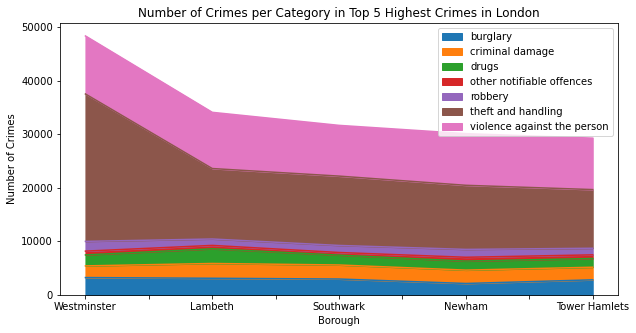

In [32]:
# membuat area plot berdasarkan katedory kejahatan

top5_crimes.plot(kind='area', figsize=(10,5))

plt.title('Number of Crimes per Category in Top 5 Highest Crimes in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Borough')

plt.show()

**Kesimpulan**: berdasarkan plot di atas, kejahatan yang paling banyak terjadi adalah Violence Against the Person, sedangkan kejahatan yang paling sedikit terjadi adalah Burglary

# Histogram

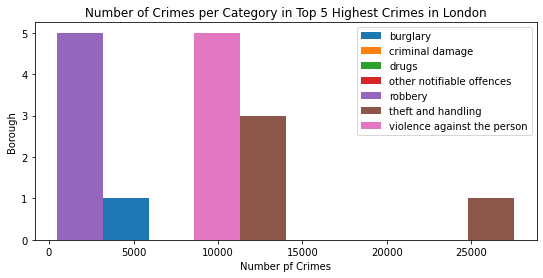

In [33]:
# membuat histogram berdasarkan kategori kejahatan

top5_crimes.plot(kind='hist', figsize=(9, 4))

plt.title('Number of Crimes per Category in Top 5 Highest Crimes in London')
plt.ylabel('Borough')
plt.xlabel('Number pf Crimes')

plt.show()

In [34]:
highest_crime_hist = highest_crime.set_index('borough')
highest_crime_hist

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
borough,,,,,,,,
Westminster,3218,2179,2049,708,1822,27520,10834,48330
Lambeth,3087,2764,2738,635,1196,13155,10496,34071
Southwark,2946,2621,1838,494,1317,12946,9474,31636
Newham,2115,2496,1684,713,1472,11964,9646,30090
Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


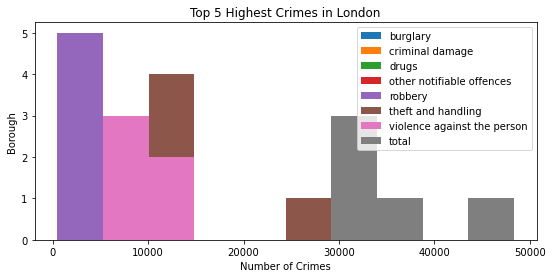

In [35]:
# membuat histogram berdasarkan wilayah dengan angka kejahatan tertinggi
highest_crime_hist.plot(kind='hist', figsize=(9, 4))

plt.title('Top 5 Highest Crimes in London')
plt.ylabel('Borough')
plt.xlabel('Number of Crimes')

plt.show()

# Bar Plot

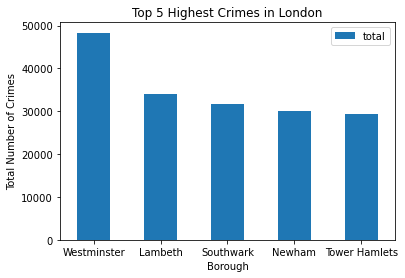

In [36]:
# membuat bar plot

highest_crime.plot(kind='bar',
         x = 'borough', y = 'total')
plt.title('Top 5 Highest Crimes in London')
plt.ylabel('Total Number of Crimes')
plt.xlabel('Borough')
plt.xticks(rotation = 0)

plt.show()

**Keimpulan** Dari bar plot diatas, Westminster adalah wilayah yang paling tidak aman karena memiliki angka kejahatan tertinggi di seluruh London, sedangkan Tower Hamlets adalah wilayah dengan angka kejahatan tertinggi ke-4

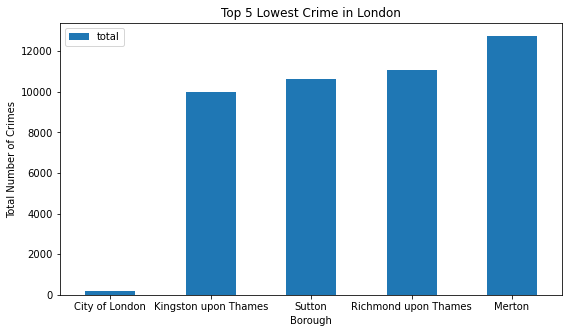

In [37]:
# bar plot berdasarkan wilayah yang memiliki 5 angka kejahatan terendah

lowest_crime.plot(kind='bar',
           x = 'borough', y = 'total', figsize=(9,5))
plt.title('Top 5 Lowest Crime in London')
plt.ylabel('Total Number of Crimes')
plt.xlabel('Borough')
plt.xticks(rotation = 0)

plt.show()

**Kesimpulan** Dari bar plot diatas, dapat disimpulkan bahwa City of London merupakan wilayah yang paling aman dari kejahatan karena memiliki angka kejahatan yang paling rendah di London

# Pie Chart

In [38]:
# set borough sebagai index

highest_crime.set_index('borough', inplace=True)

In [39]:
highest_crime.head()

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
borough,,,,,,,,
Westminster,3218,2179,2049,708,1822,27520,10834,48330
Lambeth,3087,2764,2738,635,1196,13155,10496,34071
Southwark,2946,2621,1838,494,1317,12946,9474,31636
Newham,2115,2496,1684,713,1472,11964,9646,30090
Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


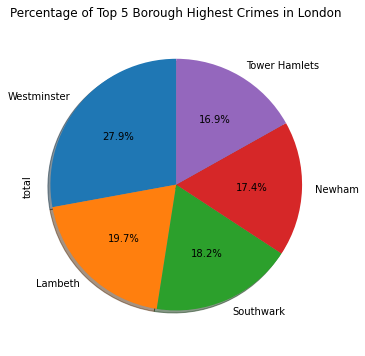

In [40]:
# membuat pie chart

highest_crime['total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%', # add in percentages
                           startangle=90,     # start angle 90°
                           shadow=True)       # add shadow
plt.title('Percentage of Top 5 Borough Highest Crimes in London')
plt.axis('equal')

plt.show()

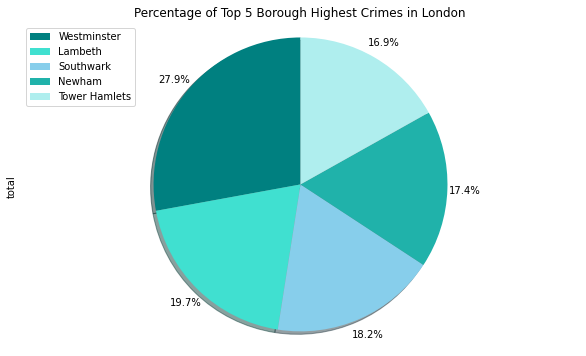

In [41]:
# upgrade the visual chart

color_list = colors_list = ['teal', 'turquoise', 'skyblue', 'lightseagreen', 'paleturquoise']
explode_list = [0.1, 0, 0, 0.1, 0.1]

highest_crime['total'].plot(kind='pie',
                   figsize=(10,6),
                   autopct='%1.1f%%', 
                   startangle=90,     
                   shadow=True,
                   labels=None,         # turn off labels on pie chart
                   pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                   colors=colors_list,  # add custom colors   
                  )
plt.title('Percentage of Top 5 Borough Highest Crimes in London')
plt.axis('equal')

plt.legend(labels=highest_crime.index, loc='upper left') 

plt.show()

**Kesimpulan** Persentase kejahatan yang terjadi di Westminster mencapai 27.9% yang berarti Westminster merupakan wilayah yang paling rawan kejahatan diantara wilayah lainnya di London

# Box Plot

In [42]:
highest_crime.head()

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
borough,,,,,,,,
Westminster,3218,2179,2049,708,1822,27520,10834,48330
Lambeth,3087,2764,2738,635,1196,13155,10496,34071
Southwark,2946,2621,1838,494,1317,12946,9474,31636
Newham,2115,2496,1684,713,1472,11964,9646,30090
Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


In [43]:
highest_crime.describe()

,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2832.000000,2483.400000,1987.600000,645.600000,1408.200000,15307.600000,10011.600000,34676.000000
std,430.856705,227.192209,450.004778,90.251316,254.456676,6882.872896,611.668865,7849.835444
min,2115.000000,2179.000000,1629.000000,494.000000,1196.000000,10953.000000,9474.000000,29253.000000
25%,2794.000000,2357.000000,1684.000000,635.000000,1234.000000,11964.000000,9608.000000,30090.000000
50%,2946.000000,2496.000000,1838.000000,678.000000,1317.000000,12946.000000,9646.000000,31636.000000
75%,3087.000000,2621.000000,2049.000000,708.000000,1472.000000,13155.000000,10496.000000,34071.000000
max,3218.000000,2764.000000,2738.000000,713.000000,1822.000000,27520.000000,10834.000000,48330.000000


In [44]:
highest_crime = highest_crime.transpose()

In [45]:
highest_crime

borough,Westminster,Lambeth,Southwark,Newham,Tower Hamlets
burglary,3218,3087,2946,2115,2794
criminal damage,2179,2764,2621,2496,2357
drugs,2049,2738,1838,1684,1629
other notifiable offences,708,635,494,713,678
robbery,1822,1196,1317,1472,1234
theft and handling,27520,13155,12946,11964,10953
violence against the person,10834,10496,9474,9646,9608
total,48330,34071,31636,30090,29253


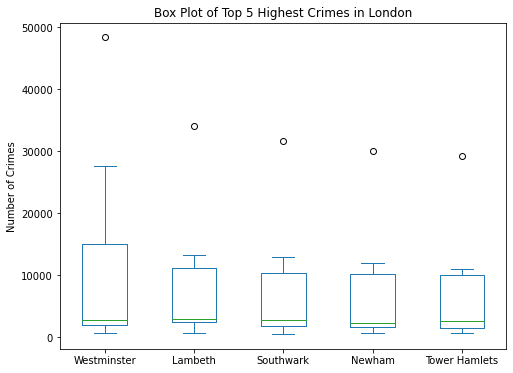

In [46]:
highest_crime.plot(kind='box', figsize = (8,6))

plt.title('Box Plot of Top 5 Highest Crimes in London')
plt.ylabel('Number of Crimes')

plt.show()

# Scatter Plot

In [47]:
# menambahkan kolom Total di dataframe london_crime

london_crime.sort_values(by='total', ascending=False, axis=0, inplace=True)

In [48]:
london_crime.head()

,borough,burglary,criminal damage,drugs,other notifiable offences,robbery,theft and handling,violence against the person,total
32,Westminster,3218,2179,2049,708,1822,27520,10834,48330
21,Lambeth,3087,2764,2738,635,1196,13155,10496,34071
27,Southwark,2946,2621,1838,494,1317,12946,9474,31636
24,Newham,2115,2496,1684,713,1472,11964,9646,30090
29,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253


In [49]:
london_crime.shape

(33, 9)

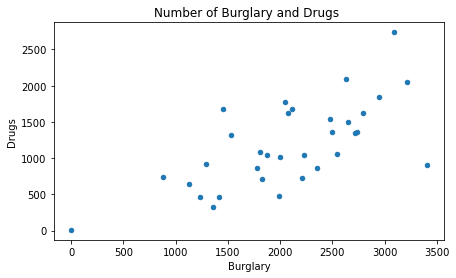

In [50]:
# membuat scatter plot berdasarkan jumlah kejahatan Drugs dan Burglary

london_crime.plot(kind='scatter', x = 'burglary', y = 'drugs', figsize=(7,4))

plt.title('Number of Burglary and Drugs ')
plt.xlabel('Burglary')
plt.ylabel('Drugs')

plt.show()

# Word Clouds

In [67]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image # converting images into arrays

In [81]:
# open the file and read it into a variable london
london = open('dataset/london.txt', 'r').read()

In [82]:
# menggunakan set untuk menghapus stopword yang berlebihan

stopwords = set(STOPWORDS)

In [85]:
# instantiate a word cloud object
london_wc = WordCloud(
background_color='white',
max_words=4000, # mengambil 2000 kata pertama saja
stopwords=stopwords)

# generate the word cloud
london_wc.generate(london)

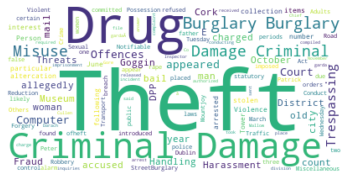

In [86]:
# memvisualisasikan word cloud

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

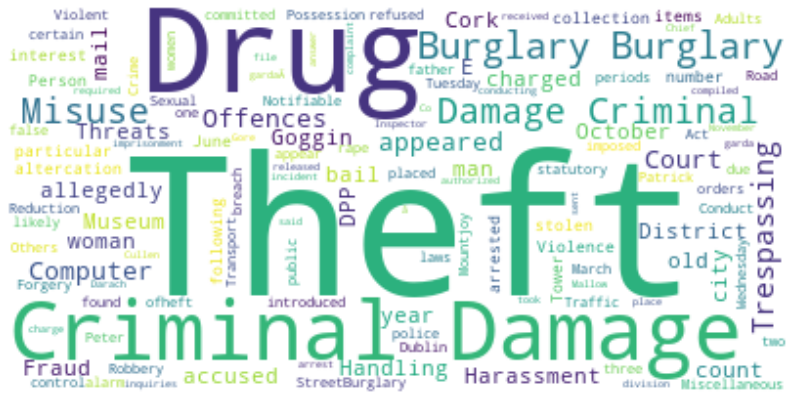

In [87]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
# save mask to london_mask
london_mask = np.array(Image.open('dataset/alice_mask.png'))

print('Image downloaded and saved')

Image downloaded and saved


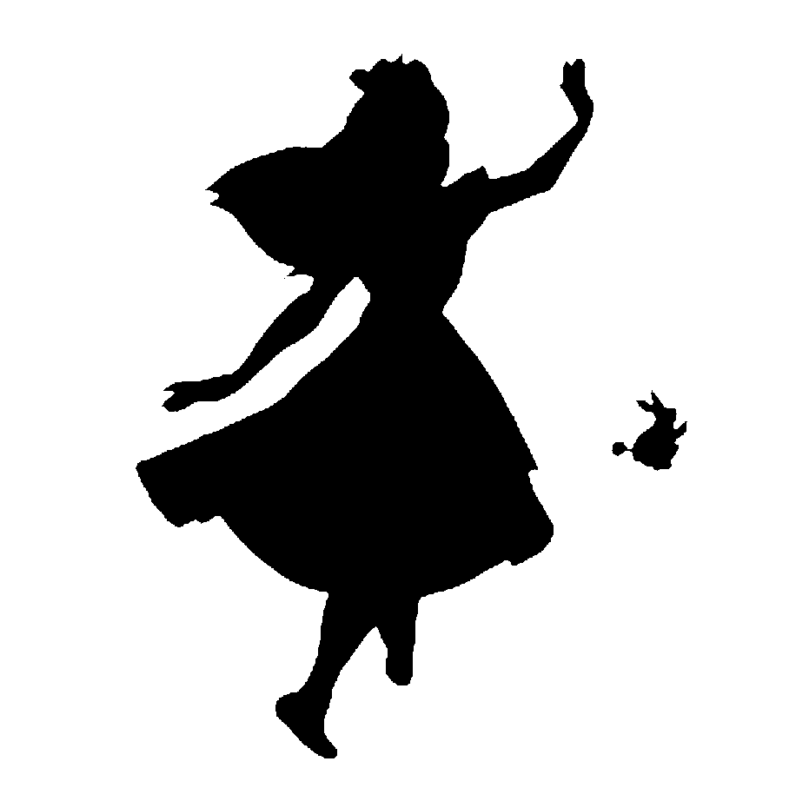

In [90]:
# mengubah ukuran cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# memvisualisasikan word cloud
plt.imshow(london_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

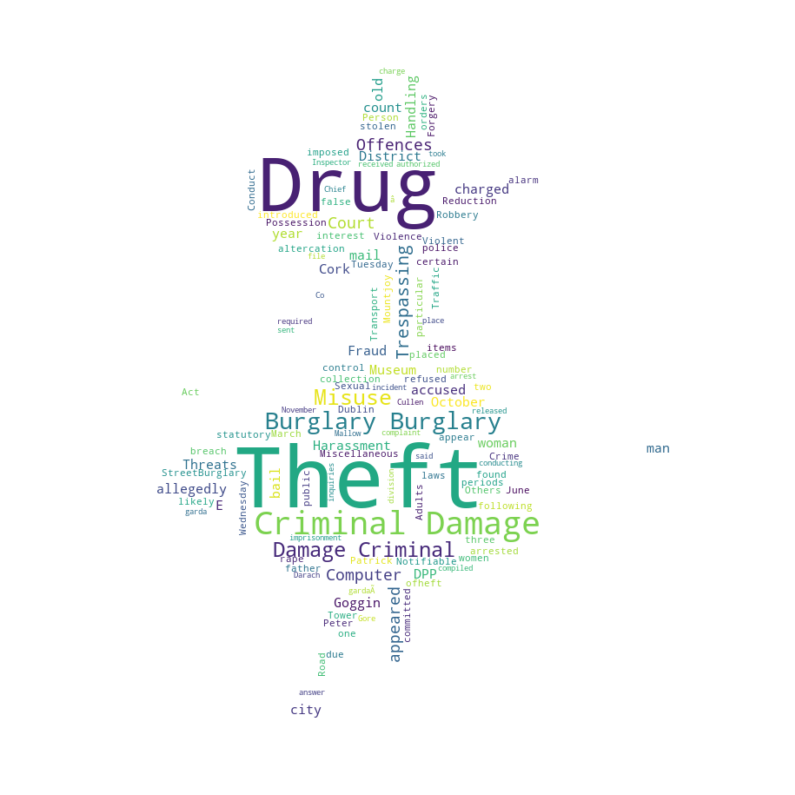

In [92]:
# instantiate a word cloud object
london_wc = WordCloud(
background_color='white',
max_words=4000, # mengambil 2000 kata pertama saja
mask=london_mask,
stopwords=stopwords)

# generate the word cloud
london_wc.generate(london)

# mengubah ukuran cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# memvisualisasikan word cloud
plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Folium

In [57]:
# mengimport library folium

import folium

In [58]:
world_map = folium.Map()
world_map

In [59]:
# membuat folium map kota London

london_map = folium.Map(location=[51.5607,  0.1557], zoom_start=10)

In [60]:
world_map

In [61]:
import geopandas as gpd
import json

In [62]:
with open('dataset/london_boroughs.json') as json_file:
    data = json.load(json_file)
    
print(data)

{'type': 'FeatureCollection', 'name': 'file23f9e20d355f2', 'features': [{'type': 'Feature', 'properties': {'id': 1, 'name': 'Kingston upon Thames', 'code': 'E09000021', 'area_hectares': 3726.117, 'inner_statistical': False}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-0.330679021892208, 51.3290110042255], [-0.330594407685802, 51.3290880335007], [-0.330506076800874, 51.3291488231289], [-0.330409170439833, 51.329208591193], [-0.330292080798994, 51.3292707692176], [-0.329913420922727, 51.3294605090526], [-0.329633553567758, 51.3296570521748], [-0.329428743782426, 51.3298420756319], [-0.329320874634715, 51.3299664328746], [-0.329214439571928, 51.3300908104757], [-0.329116282503008, 51.3302638658986], [-0.329112914697426, 51.330396008489], [-0.329171126657569, 51.3307295636276], [-0.329191261261383, 51.3309654559072], [-0.329302869489851, 51.3315281836161], [-0.329362730478144, 51.3316189630429], [-0.329554511276664, 51.3318716914623], [-0.32957894755712, 51.3321867794729], [-0